In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

print("Train set accuracy = " + str(tree_clf.score(X_train, y_train)))
print("Test set accuracy = " + str(tree_clf.score(X_test, y_test)))

Train set accuracy = 0.9821428571428571
Test set accuracy = 1.0


In [13]:
export_graphviz(tree_clf, out_file="iris_tree.dot",
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True, filled=True)

In [25]:
!dot -Tpng iris_tree.dot -o iris_tree.png

/usr/bin/bash: dot: command not found


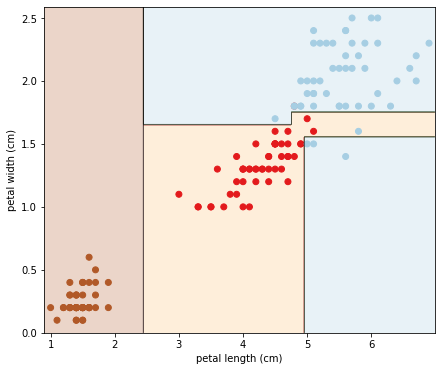

In [29]:
'''
-samples
-gini
    = 0 mean every samples in one Node
    = 0.5 mean the sample exist in 2 Node same time

Classification And Regression (CART)
Gi = 1-sum((pi^2)*(k))
J(k, tk) = (ml*Gl)/m    +   (mr*Gr)/m

'''

def plot_decision_boundary(clf, X, y, cmap='Paired_r'):
    h = 0.010
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

plot_decision_boundary(tree_clf, X, y)